<a href="https://colab.research.google.com/github/SQuinn314/SQuinn314/blob/main/Linear_DCT_and_JPEG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# JPEGs and the Discrete Cosine Transform

The goal of this lecture is to see how an orthogonal basis can be used to encode images.

$$ X_k = \sum_{n=0}^{N-1} x_n \cos\left(\frac{\pi}{N} \left(n + \frac{1}{2} \right) k \right) $$



First, get some packages to run this program.  `PIL` is for image processing, `numpy` is a mathematics package, `google.colab` is to load and save files with Colab.

In [ ]:
from IPython.display import display
from PIL import Image as Img
from PIL import ImageTk
import numpy as np
from IPython.display import Image
from google.colab import files


Next little bit will demonstrate how to work with images.

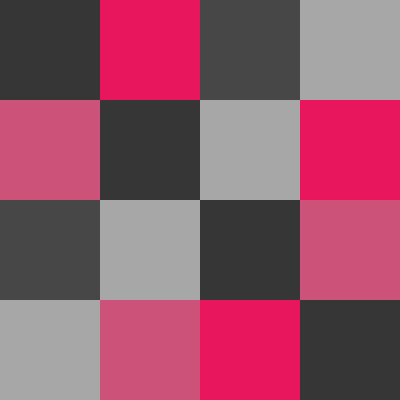

In [ ]:

# This is a simple example how pixels are stored.  This is a 4x4 image with RGB.
pixels = [
   [(54, 54, 54), (232, 23, 93), (71, 71, 71), (168, 167, 167)],
   [(204, 82, 122), (54, 54, 54), (168, 167, 167), (232, 23, 93)],
   [(71, 71, 71), (168, 167, 167), (54, 54, 54), (204, 82, 122)],
   [(168, 167, 167), (204, 82, 122), (232, 23, 93), (54, 54, 54)]
]

# Convert the pixels into an array using numpy
array = np.array(pixels, dtype=np.uint8)

# Use PIL to create an image from the new array of pixels
new_image = Img.fromarray(array)

large_img = new_image.resize((400,400),Img.NEAREST)
large_img.save('mypic.png')

Image('mypic.png', width=400, height=400)

Next, we have some functions we will use.

`dct` is the discrete cosine transform.  It turns an $8 \times 8$ pixel into an $8 \times 8$ (frequency values).

`dct` is the inverse discrete cosine transform.  It turns an $8 \times 8$ grid of frequency information back into pixel intensity.

The Discrete Cosine Transform considers an $8 \times 8$ array $A$ is

$$ G(u,v) = \frac{1}{4} \alpha(u) \alpha(v) \sum_{x=0}^7 \sum_{y=0}^7 a_{x,y} \cos\left( \frac{(2x+1) u \pi}{16} \right) \cos\left( \frac{(2y+1) v \pi}{16}\right) $$
where $$\alpha(u) = \begin{cases} \frac{1}{\sqrt{2}} & u = 0 \\ 1 & u \neq 0 \end{cases}$$ is the normalizing factor.

The values of $u$ and $v$ are the horizontal and vertical frequencies, respectively.  Note that when $u = 0$ and $v=0$, the cosines are constants.  Otherwise, for $x=0 \dots 7$, you have one cycle of the cosine.



In [ ]:
def dct(square,u,v):
  au = alpha(u)
  av = alpha(v)
  doublesum = 0.0
  for x in range(8):
    for y in range(8):
      doublesum += square[x][y] * np.cos((2*x+1)*u*np.pi/16) * np.cos((2*y+1)*v*np.pi/16)
  return au*av*doublesum/4

def dctdecode(square, x, y):
  value = 0.0
  for u in range(8):
    for v in range(8):
      au = alpha(u)
      av = alpha(v)
      value += au*av*square[u][v] * np.cos((2*x+1)*u*np.pi/16) * np.cos((2*y+1)*v*np.pi/16)
  return value/4

def alpha(u):
  if u==0:
    return 1/np.sqrt(2)
  else:
    return 1

def displayLargeImage(image):
  large_img = image.resize((400,400),Img.NEAREST)
  large_img.save('mypic.png')
  Image('mypic.png', width=400, height=400)


Here, let us look at how simple looking images get encoded.

First up, a gradient image.

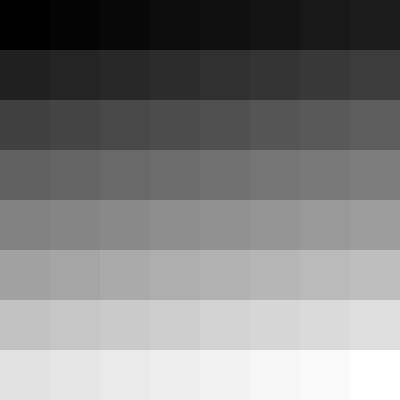

In [ ]:
# gradient between 0 and 1 for 256*256
array = np.linspace(0,1,8*8) # 64 values increasing from 0 to 1 evenly.
gradientMatrix = np.reshape(array,(8,8)) # Turn the list into an 8x8 grid
gradientMatrix = np.uint8(gradientMatrix * 255) # Let values range from 0 to 255, round to nearest integer, express with 8 bits.


# Creates PIL image
img = Img.fromarray(gradientMatrix , 'L')

large_img = img.resize((400,400),Img.NEAREST)
large_img.save('mypic.png')
Image('mypic.png', width=400, height=400)

In [ ]:
gradientMatrix

array([[  0,   4,   8,  12,  16,  20,  24,  28],
       [ 32,  36,  40,  44,  48,  52,  56,  60],
       [ 64,  68,  72,  76,  80,  85,  89,  93],
       [ 97, 101, 105, 109, 113, 117, 121, 125],
       [129, 133, 137, 141, 145, 149, 153, 157],
       [161, 165, 170, 174, 178, 182, 186, 190],
       [194, 198, 202, 206, 210, 214, 218, 222],
       [226, 230, 234, 238, 242, 246, 250, 255]], dtype=uint8)

In [ ]:
myMatrix = gradientMatrix

myMatrix = myMatrix - 128

dctmat = np.zeros((8,8), dtype=float)
for u in range(8):
  for v in range(8):
    dctmat[u][v] = dct(myMatrix, u, v)

dctmat

array([[ 1.01625000e+03, -7.37988854e+01,  9.56708581e-02,
        -7.81786983e+00,  3.26579231e-14, -2.25531996e+00,
         2.30969883e-01, -6.27654278e-01],
       [ 3.38402446e+02,  1.63320371e-01,  8.32600029e-02,
         3.40097066e-01, -2.71591850e-01,  1.09127183e-01,
        -1.15848799e-01, -6.76495125e-02],
       [ 9.56708581e-02,  1.73379981e-01,  2.50000000e-01,
        -1.64111103e-01,  2.30969883e-01, -1.91016910e-01,
        -3.55271368e-15, -3.44874224e-02],
       [-3.86820124e+02,  3.40097066e-01, -7.38940732e-01,
        -6.76495125e-02,  2.63955304e-02,  1.63320371e-01,
        -4.06806885e-02,  2.44426208e-01],
       [-1.13046657e-13,  5.65560751e-01,  2.30969883e-01,
        -9.53703752e-02,  2.50000000e-01, -2.14060669e-01,
        -9.56708581e-02, -1.49518669e-02],
       [ 2.00251565e+02,  1.09127183e-01, -1.95355555e-02,
         1.63320371e-01, -1.32699292e-01,  6.76495125e-02,
        -6.08829528e-02, -1.34563247e-02],
       [ 2.30969883e-01, -1.059305

In [ ]:
dctmat_rounded = dctmat.astype(int)
dctmat_rounded

array([[1016,  -73,    0,   -7,    0,   -2,    0,    0],
       [ 338,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0],
       [-386,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0],
       [ 200,    0,    0,    0,    0,    0,    0,    0],
       [   0,   -1,    0,    0,    0,    0,    0,    0],
       [-189,    0,    0,    0,    0,    0,    0,    0]])

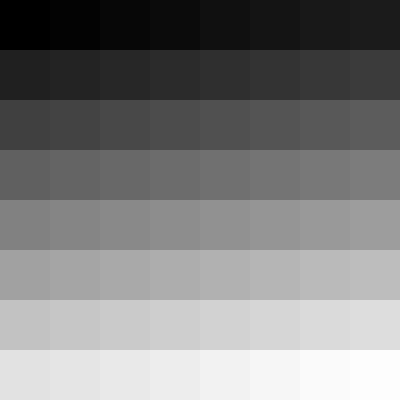

In [ ]:
uncoded = np.empty((8,8), dtype=float)
for x in range(8):
  for y in range(8):
    uncoded[x][y] = dctdecode(dctmat_rounded, x, y)

uncoded = np.uint8(uncoded)
uncoded = uncoded + 128

img2 = Img.fromarray(np.uint8(uncoded) , 'L')

large_img = img2.resize((400,400),Img.NEAREST)
large_img.save('mypic.png')
Image('mypic.png', width=400, height=400)

In [ ]:
np.uint8(uncoded)

array([[  0,   3,   7,  11,  16,  20,  24,  27],
       [ 32,  35,  39,  43,  47,  51,  55,  59],
       [ 64,  67,  72,  76,  80,  84,  88,  92],
       [ 96, 100, 104, 108, 112, 116, 120, 124],
       [129, 133, 137, 141, 145, 149, 153, 157],
       [161, 165, 169, 173, 177, 181, 186, 189],
       [194, 198, 202, 206, 210, 214, 218, 221],
       [226, 229, 233, 237, 242, 246, 250, 253]], dtype=uint8)

Compare this with the original matrix, it is pretty much the same, with most values being off by 1 or so.

# Quantization
A common technique is to quantize the matrix.  This will try to drop less common or less important frequencies.  A quantization matrix $Q$ is used to componentwise normalize the values.

In [ ]:
# This is an example Quantization Matrix.
quantmatrix = [[16, 11, 10, 16, 24, 40, 51, 61],
               [12, 12, 14, 19, 26, 58, 60, 55],
               [14, 13, 16, 24, 40, 57, 69, 56],
               [14, 17, 22, 29, 51, 87, 80, 62],
               [18, 22, 37, 56, 68, 109, 103, 77],
               [24, 35, 55, 64, 81, 104, 113, 92],
               [49, 64, 78, 87, 103, 121, 120, 101],
               [72, 92, 95, 98, 112, 100, 103, 99]]

quantdct = np.divide(dctmat,quantmatrix)
quantdct = np.rint(quantdct)
quantdct


array([[ 64.,  -7.,   0.,  -0.,   0.,  -0.,   0.,  -0.],
       [ 28.,   0.,   0.,   0.,  -0.,   0.,  -0.,  -0.],
       [  0.,   0.,   0.,  -0.,   0.,  -0.,  -0.,  -0.],
       [-28.,   0.,  -0.,  -0.,   0.,   0.,  -0.,   0.],
       [ -0.,   0.,   0.,  -0.,   0.,  -0.,  -0.,  -0.],
       [  8.,   0.,  -0.,   0.,  -0.,   0.,  -0.,  -0.],
       [  0.,  -0.,   0.,  -0.,  -0.,   0.,   0.,  -0.],
       [ -3.,  -0.,   0.,   0.,  -0.,  -0.,  -0.,  -0.]])

In [ ]:
dequantized = np.multiply(quantdct, quantmatrix)
dequantized

array([[1024.,  -77.,    0.,   -0.,    0.,   -0.,    0.,   -0.],
       [ 336.,    0.,    0.,    0.,   -0.,    0.,   -0.,   -0.],
       [   0.,    0.,    0.,   -0.,    0.,   -0.,   -0.,   -0.],
       [-392.,    0.,   -0.,   -0.,    0.,    0.,   -0.,    0.],
       [  -0.,    0.,    0.,   -0.,    0.,   -0.,   -0.,   -0.],
       [ 192.,    0.,   -0.,    0.,   -0.,    0.,   -0.,   -0.],
       [   0.,   -0.,    0.,   -0.,   -0.,    0.,    0.,   -0.],
       [-216.,   -0.,    0.,    0.,   -0.,   -0.,   -0.,   -0.]])

Compare this with the original DCT matrix.

In [ ]:
dctmat_rounded

array([[1016,  -73,    0,   -7,    0,   -2,    0,    0],
       [ 338,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0],
       [-386,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0],
       [ 200,    0,    0,    0,    0,    0,    0,    0],
       [   0,   -1,    0,    0,    0,    0,    0,    0],
       [-189,    0,    0,    0,    0,    0,    0,    0]])

Lets get the image from the quantized matrix.

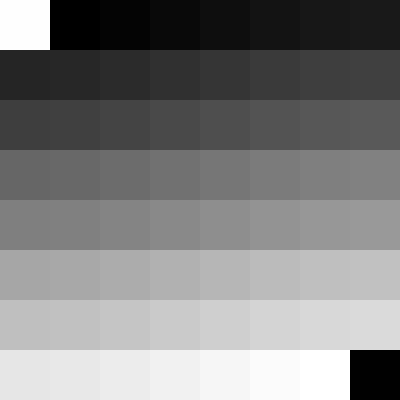

In [ ]:
uncoded = np.empty((8,8), dtype=float)
for x in range(8):
  for y in range(8):
    uncoded[x][y] = dctdecode(dequantized, x, y)

uncoded2 = np.uint8(uncoded)
uncoded2 = uncoded2 + 128

img2 = Img.fromarray(np.uint8(uncoded2) , 'L')

large_img = img2.resize((400,400),Img.NEAREST)
large_img.save('mypic.png')
Image('mypic.png', width=400, height=400)

# 

## Lets look at the frequencies

We will look at images with only one frequency value.

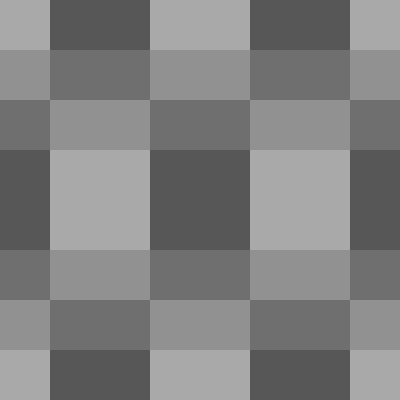

In [ ]:
dctman = 0
dctmat = np.zeros((8,8), dtype=float)
dctmat[2][4] = 256

uncoded = np.zeros((8,8), dtype=float)
for x in range(8):
  for y in range(8):
    uncoded[x][y] = dctdecode(dctmat, x, y)

uncoded = np.uint8(uncoded)
uncoded = uncoded + 128

img = Img.fromarray(np.uint8(uncoded) , 'L')

large_img = img.resize((400,400),Img.NEAREST)
large_img.save('mypic.png')
Image('mypic.png', width=400, height=400)

In [ ]:
dctmat

array([[1024.        , 1903.26482748, 2384.13171058, 3172.20654227,
        2708.64423331, 1660.30557358, 1133.88362975, 1410.77668819],
       [1197.34844296, 1648.68933673, 1393.04799729, 2384.90909946,
        1709.1465908 , 1514.67453642,  810.2983893 ,  822.97694857],
       [2157.50006643, 1440.20664169, 1147.00853718, 2149.59744673,
        1827.15627969, 1895.4525748 , 1275.90085182,  801.29497188],
       [2040.08409394, 2092.0811759 , 1168.47845726, 2004.68366331,
        2065.51054753, 2517.08856749, 1591.13173692, 1264.06645899],
       [3069.6164118 , 2567.28698465, 2070.56106883, 2383.06681124,
        1901.08874926, 2652.75951064, 1613.62645661,  733.19639557],
       [2925.62315556, 2378.52736994, 2647.11340024, 2431.21192792,
        2612.14224616, 2532.92913992, 2054.98524652,  912.05437876],
       [1629.97112934, 2259.79175027, 2233.10408554, 2288.62305255,
        2661.78537215, 2002.36766636, 2345.90247598, 1068.65889103],
       [2082.98983844, 2228.62948555, 193

In [ ]:
mat3 = np.array([[60.,  7., -9.,  5.,  0.,  1., -2., -2.],
       [-6., -1., -2., -3.,  3., -1.,  1., -3.],
       [-1., -2., -4., -5.,  3., -1., -2.,  2.],
       [ 5.,  2., -2., -2., -1., -0.,  1.,  1.],
       [ 2., -0., -0.,  0.,  0., -1.,  0., -1.],
       [ 1., -3., -1., -1.,  0., -1., -1.,  1.],
       [ 2.,  1., -0.,  1.,  1.,  1.,  1.,  1.],
       [-0.,  1., -0.,  0.,  0.,  1., -0., -0.]])

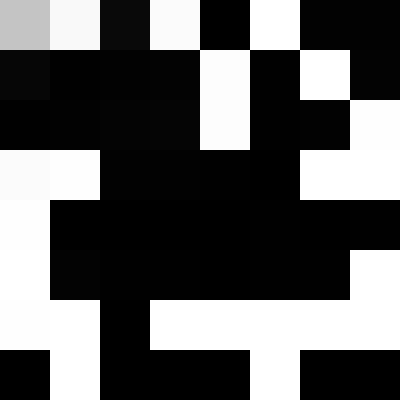

In [ ]:
mat3 = np.array([[60.,  7., -9.,  5.,  0.,  1., -2., -2.],
       [-6., -1., -2., -3.,  3., -1.,  1., -3.],
       [-1., -2., -4., -5.,  3., -1., -2.,  2.],
       [ 5.,  2., -2., -2., -1., -0.,  1.,  1.],
       [ 2., -0., -0.,  0.,  0., -1.,  0., -1.],
       [ 1., -3., -1., -1.,  0., -1., -1.,  1.],
       [ 2.,  1., -0.,  1.,  1.,  1.,  1.,  1.],
       [-0.,  1., -0.,  0.,  0.,  1., -0., -0.]])

# Creates PIL image
img = Img.fromarray(np.uint8(mat3 * 255) , 'L')

large_img = img.resize((400,400),Img.NEAREST)
large_img.save('mypic.png')

Image('mypic.png', width=400, height=400)